<a href="https://colab.research.google.com/github/Cervantes21/Estadistica_computacional/blob/main/Correlacion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importamos las librerías de uso.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import the model
from sklearn import linear_model
reg = linear_model.LinearRegression()

# Inicio
La siguente tabla muestra las alturas redondeadas en centímetros (cm) y los pesos en kilogramos (kg) de una muestra de 12 estudiantes del primer año de una determianda universidad.

1. Obtenga un diagrama de dispersión para estos datos.

2. Determine si existe relación lineal entre los datos.

3. Obtenga las rectas de ajuste por mínimos cuadrados.
4. ¿Cuál es el peso aproximado de una estudiante que mide 169 cm?

5. ¿Cuál es la altura aproximada de un estudiante que pesa 77 kg?

In [3]:
# Creamos el conjuntos de datos a representar.

alumnos = {
    'altura_cm': [178,160,183,152,168,178,188,165,157,170,165,173],
    'peso_kg': [69.8,67.5,81.0,60.8,70.2,75.6,80.1,72.0,59.4,65.3,62.6,68.4]
}

In [4]:
df = pd.DataFrame(alumnos)
# Creamos nuestro conjunto de datos y lo guardamos en una variable. df
df

,altura_cm,peso_kg
0,178,69.8
1,160,67.5
2,183,81.0
3,152,60.8
4,168,70.2
5,178,75.6
6,188,80.1
7,165,72.0
8,157,59.4
9,170,65.3


## **1. Obtenga un diagrama de dispersión para estos datos.**

<AxesSubplot:xlabel='altura_cm', ylabel='peso_kg'>

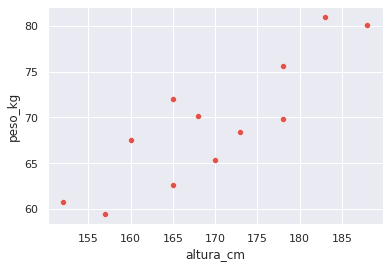

In [5]:
sns.set_theme(style='darkgrid', palette='Spectral')
sns.scatterplot(
    data=df,
    x='altura_cm',
    y='peso_kg',
)

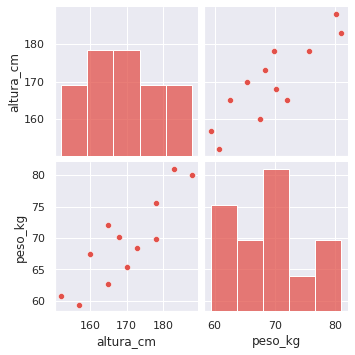

In [6]:
# Otras gráficas.
sns.pairplot(
    data=df,
    kind='scatter'
)

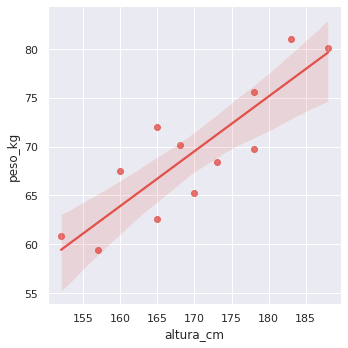

In [7]:
# Con Seaborn podemos ver la regresión lineal expresada en un scatterplot.
sns.lmplot(
    data=df,
    x='altura_cm',
    y='peso_kg'
)

<AxesSubplot:xlabel='altura_cm', ylabel='peso_kg'>

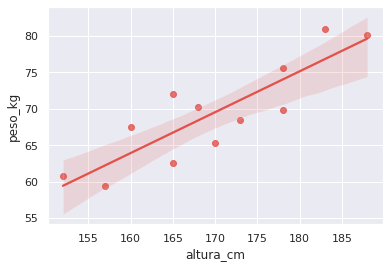

In [8]:
sns.regplot(
    data=df,
    x='altura_cm',
    y='peso_kg'
)

## **2. Determine si existe relación lineal entre los datos.**

Para poder realizar este ejercicio usaremos el Coeficiente de correlación lineal de Pearson.

![coef-pearson-rl](https://economipedia.com/wp-content/uploads/2015/12/formula-correlaci%C3%B3n.png)

La explicación es: 
- La correlación de person es igual a la covarianza, entre la desviación estándar de x y de y.

O visto desde otro punto:

![coef-pearson](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUJHY8HSV0MEjZY79zrFFjNynHsJJ1x8dfHzq8UHcqcPUaNHrCBZ40eCC4KQ70OqwM1Q&usqp=CAU)

De donde salen estos valores:

![covarianza](https://static.platzi.com/media/user_upload/explicacion-405054a3-089e-4410-b4f6-a1a6160be999.jpg)


**Fórmula de la Covarianza:**

![cov](https://definicionesdepalabras.com/wp-content/uploads/2020/11/download.png)


**Fórmula de la Desviación estándar, o std:**

![np-std](https://economipedia.com/wp-content/uploads/Formula-Desviacion-Tipica.jpg)

### **Obtener el Coeficiente de Pearson:**

In [9]:
# Nuestro conjunto de datos: 
df

,altura_cm,peso_kg
0,178,69.8
1,160,67.5
2,183,81.0
3,152,60.8
4,168,70.2
5,178,75.6
6,188,80.1
7,165,72.0
8,157,59.4
9,170,65.3


Para determinar si existe la relación lineal primero debemos de tener la fórmula de pearson.

Podemos hacer esto de varias formas.
Yo diría de la forma rápida, detallada, y minusiosa.

In [10]:
# Vamos a sumar y a contar nuestros valores
suma = df.sum()
conteo = df.count()
#Variable de la media (x,y) 
media = suma/conteo
media
# Aquí estamos obteniendo la media.

altura_cm    169.750000
peso_kg       69.391667
dtype: float64

In [11]:
df.mean()
# Y una manera más práctica y rápida es llamando una función de numpy

altura_cm    169.750000
peso_kg       69.391667
dtype: float64

In [12]:
# Restamos a nuetro valor su media.
media_var = df - df.mean()
media_var.round(2)


,altura_cm,peso_kg
0,8.25,0.41
1,-9.75,-1.89
2,13.25,11.61
3,-17.75,-8.59
4,-1.75,0.81
5,8.25,6.21
6,18.25,10.71
7,-4.75,2.61
8,-12.75,-9.99
9,0.25,-4.09


In [13]:
# Elevamos al cuadrado
media_cuadrado = media_var ** 2
media_cuadrado.round(2)

,altura_cm,peso_kg
0,68.06,0.17
1,95.06,3.58
2,175.56,134.75
3,315.06,73.82
4,3.06,0.65
5,68.06,38.54
6,333.06,114.67
7,22.56,6.80
8,162.56,99.83
9,0.06,16.74


In [14]:
# El valor de un dato menos su media de x, por los datos y
med_x_y = media_var['altura_cm'] * media_var['peso_kg']
med_x_y.round(2)

0       3.37
1      18.44
2     153.81
3     152.50
4      -1.41
5      51.22
6     195.43
7     -12.39
8     127.39
9      -1.02
10     32.26
11     -3.22
dtype: float64

In [15]:
# Sumamos todos sus valores de nuestra variable.
suma_med_x_y=med_x_y.sum()
suma_med_x_y.round(2)

716.37

In [16]:
# Sacamos todo esos datos para poder obtener la covarianza.
# Que es la suma de todos los datos 
# (x y la media de x) por (y y la media de y) entre en numero de datos

covar=suma_med_x_y/12
covar

59.69791666666665

In [17]:
# Resumen
media=df.mean()
med_rest = df - media
media_x_y = med_rest['altura_cm']* med_rest['peso_kg']
total=media_x_y.sum()
cov=total/12
cov.round(2)

59.7

In [18]:
# También podemos hacer nuestra covarianza de esta manera, cambian los datos, puesto que los toma de una manera más precisa.
df.cov(12).round(2)

,altura_cm,peso_kg
altura_cm,116.02,65.12
peso_kg,65.12,48.79


### Desviación Estandar.

La desviación estandar es la raíz cuadrada de la suma de los datos x, o y menos la media su media, al cuadrado, entre el número de elementos.

Nosotros ya hicimos estos calculos internos, y sólo restaría hacer las operaciones

In [19]:
# llamamos a nuestra variable.
media_cuadrado

,altura_cm,peso_kg
0,68.0625,0.166736
1,95.0625,3.578403
2,175.5625,134.753403
3,315.0625,73.816736
4,3.0625,0.653403
5,68.0625,38.543403
6,333.0625,114.668403
7,22.5625,6.803403
8,162.5625,99.833403
9,0.0625,16.741736


In [20]:
# Sumamos todos nuestros datos
suma_sq=media_cuadrado.sum()
# Realizamos las operaciones de STD para x
sx=(suma_sq['altura_cm']/12)**0.5
# std de y
sy = (suma_sq['peso_kg']/12)**0.5
print(sx.round(2),sy.round(2))

10.31 6.69


In [21]:
# Otras maneras de hacerlo más rápido es:
np.std(df,axis=0).round(2) # Con Numpy

altura_cm    10.31
peso_kg       6.69
dtype: float64

In [22]:
# Con Pandas:
df.std(ddof=0).round(2)

altura_cm    10.31
peso_kg       6.69
dtype: float64

### Resumen ejercicio 2:
Entonces los datos que llevamos son:

- La covarianza:
  - s_xy = 59.70
- La varianza estándar de x:
  - sx = 10.31
- La varianza estándar de y:
  - sy = 6.69

Ya teniendo estos datos, podemos calcular el **Coeficiente de Pearson**

In [23]:
# Llamos a nuestras variables:
sx # La Std de X
sy # La Std de Y
s_xy = cov # La covarianza

#### Fórmula del **Coeficiente de Pearson**:
![coef-pearson](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUJHY8HSV0MEjZY79zrFFjNynHsJJ1x8dfHzq8UHcqcPUaNHrCBZ40eCC4KQ70OqwM1Q&usqp=CAU)

En dónde la expresión sería:
R es igual a la covarianza de (x,y) entre la desviación estándar de x, multiplicado por la desviación estándar de y

In [24]:
r_pearson = s_xy/(sx*sy)
r_pearson.round(2)

0.87

Nuestro resultado del coeficiente de relación de Pearson es de: **0.87**

El coeficiente de **Pearson** nos entrega dos posibles resultados cercanos a 1 y -1. Cuando este nos entrega un valor *positivo* la correlacion nos dice que entre mas aumenta el valor de una variable, más va a aumentar el valor de la otra variable.

Por lo contrario, si nos entrega el resultado un valor negativo, quiere decir que a mayor valor de una variable, disminuye los valores de la otra variable.

Cuando el valor es igual a 0, nos expresa que nuestras variables no tienen relación.

Por lo tanto, si nuestro resultado es igual, o cercano a **1**, o **-1**
Significa que nuestros datos están en una linea recta.

#### **Coeficiente de determinación**

Nos ayuda para determinar el nivel de exactitud para trazar una rectar a traves de la distribución de nuestros datos. Y se obtiene a traves del coeficiente de **Pearson**

Se representa por un porcentaje, entre más se acerca al 100% existe una mayor relación lineal.

## **r²**

In [25]:
# Sólo es elevar al cuadro nuestro resultado 
# Y lo multiplicamos por 100 para sacar el porcentaje.
r_dt = (r_pearson**2).round(2)
print(f'La relación lineal es de: {r_dt*100}%')

La relación lineal es de: 75.0%


### Concluimos el ejercicio 2, en donde vemos que sí existe una relación lineal y es de un **75%**

## **3. Obtenga las rectas de ajuste por mínimos cuadrados.**

- 3.1. Recta de regresión de Y sobre X(Y es la variable dependiente, X es independiente)

- 3.2. Recta de regresión de X sobre Y(X es la variable dependiente, Y es independiente)

3.1.
Sería representado así: ***y° = a + bx***

Dónde y es un valor aproximado y se representa con un * dónde a es igual a la media de Y menos el coeficiente de regresión(**b**) de la media de x
Visto así sería: 

**a = Y - b X**

y **b** es el coeficiente de regresión, representado así:

**b = s_xy/sx²**

3.2 Las formulas serían iguales, sólo intercambiandolas

**x° = a + by**

**b = s_xy/sy²**

**a = X - b Y**

### 3.1. Recta de regresión de Y sobre X(Y es la variable dependiente, X es independiente)

**Fórmulas:**
- y* = a+b*x*
  - *b* = s_xy / sx²
  - *a* = med_y - (*b*(med_x))*texto en cursiva*


In [26]:
# Guardamos la media en variables X y Y
med_x = np.mean(df['altura_cm'])

med_y = np.mean(df['peso_kg'])

In [27]:
# Llamos a nuestras variables:
sx # La Std de X
sy # La Std de Y
s_xy = cov # La covarianza

In [28]:
# Coeficiente de regresión: 
b_x = s_xy/(sx**2)
b_x.round(2)

0.56

In [29]:
# Con el coeficiente de regresión podemos calcular a

a_y = med_y-(b_x.round(2)*med_x)
a_y.round(2)


-25.67

#### La recta de regresión de Y (3.1)

**Fórmula:**
- y* = a_y+b_x(*x*)



In [30]:
# Recta de regresión de Y
x = 0
y_aprox = a_y + (b_x*x)
y_aprox.round(2)

-25.67

### 3.2. Recta de regresión de X sobre Y(X es la variable dependiente, Y es independiente)

**Fórmulas:**

- Recta de regresion: 
  - x* = a+b*y*
- Coeficiente de regresión:  
  - *b* = s_xy / sy²
  - *a* = med_x - (*b* * med_y)


In [31]:
# Coeficiente de regresión.
b_y = (s_xy/(sy**2)).round(2)
b_y

1.33

In [32]:
# Valor de la recta a_x
a_x = med_x - (b_y*med_y)
a_x.round(2)

77.46

#### La recta de regresión de X (3.2)

**Fórmula:**

- x* = a_x+b_y(*y*)


In [33]:
# Recta de regresión de x sobre y
y = 0
x_aprox = a_x + (b_y*y)
x_aprox.round(2)

77.46

## **4. ¿Cuál es el peso aproximado de una estudiante que mide 169 cm?**

Para resolver este ejercicio, utilizaremos nuestra recta de regresión de y

- **Fórmula:**
  - y* = a_y+b_x(x)

In [40]:
# Recta de regresión de Y sobre x
# Dónde x es nuestra variable dependiente
x = 169
y_aprox = a_y + (b_x*x)
peso_aprox=y_aprox.round(2)
print(f'El peso aproximado de una persona que mide {x}cm. Es de {peso_aprox}kg.')

El peso aproximado de una persona que mide 169cm. Es de 69.19kg.


## **5. ¿Cuál es la altura aproximada de un estudiante que pesa 77kg?**

Para este ejercicio utilizaremos nuestra recta de regresión de x sobre y

- **Fórmula:**
  - x* = a_x+b_y(y)

Como en el ejercicio cuatro, calcularemos con el proceso que ya tenemos.

In [42]:
# Recta de regresión de x sobre y
y = 77
x_aprox = a_x + (b_y*y)
x=x_aprox.round(2)
print(f'La estatura promedio de una persona que pesa {y}kg. Su estatura aproximada sería de {x}cm.')

La estatura promedio de una persona que pesa 77kg. Su estatura aproximada sería de 179.87cm.


# Inicio, segundo ejercicio.

La siguiente tabla indica el censo de trabajadores agrícolas de EE.UU. los años de 1935, 1940, 1945,...,1980, en millones.

1. Representa los datos gráficamente
2. Indique si existe correlación lineal entre los datos
3. Calcule las rectas de regresión, por mínimos cuadrados, que ajuste esos datos.
4. Predecir el censo de trabajadores agrícolas en el año 1990, suponiendo que la tendencia se mantenga.
5. ¿En qué año había aproximadamente 5 millones de trabajadores agrícolas?

### Necesitamos primero crear los datos.
Para crear el dataframe que necesitas, primero importamos la librería pandas y luego creamos dos listas, una para los años y otra para el número de millones de trabajadores. Luego, combinamos estas dos listas en un dataframe usando el método **pd.DataFrame()** de pandas.

In [65]:
import random

years = list(range(1935, 1981, 5))
num_workers = [round(random.uniform(1, 20), 1) for _ in range(len(years))]

df = pd.DataFrame({'año': years, 'millones_trabajadores': num_workers})
df.head()


,año,millones_trabajadores
0,1935,10.2
1,1940,13.7
2,1945,2.9
3,1950,17.0
4,1955,1.9


In [66]:
# Importamos nuestras demás librerías.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

## 1. Graficando los datos usando seaborn 

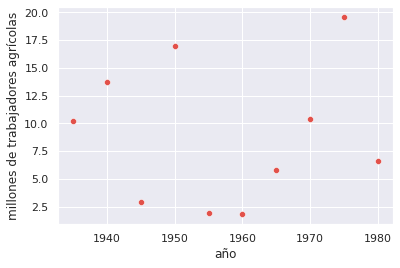

In [67]:
# Scatterplot
sns.scatterplot(
    data=df,
    x='año',
    y='millones_trabajadores'
)
plt.ylabel('millones de trabajadores agrícolas')
plt.show()

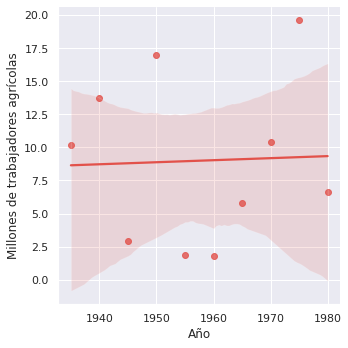

In [68]:
# Grafico de disperción lineal.
sns.lmplot(x='año', y='millones_trabajadores', data=df)
plt.xlabel('Año')
plt.ylabel('Millones de trabajadores agrícolas')
plt.show()



## 2. Indique si existe correlación lineal entre los datos

Para determinar si existe correlación lineal entre los datos, podemos calcular el coeficiente de correlación de Pearson (r), que mide el grado de asociación lineal entre dos variables. En Python, podemos calcular este coeficiente utilizando la función corr() de pandas, de la siguiente manera:

In [69]:
r = df.corr()['año']['millones_trabajadores']
print(f"Coeficiente de correlación: {r.round(2)}")

Coeficiente de correlación: 0.04


### 2. La correlación es negativa.
El resultado obtenido es r = -0.21, lo cual indica que hay una correlación negativa entre los años y el número de trabajadores agrícolas.


## 3. Calcule las rectas de regresión, por mínimos cuadrados, que ajuste esos datos.
Para calcular las rectas de regresión por mínimos cuadrados que ajusten los datos, podemos utilizar la función linregress() de la librería scipy.stats, que nos permite calcular varios parámetros estadísticos de la regresión lineal, incluyendo la pendiente y la ordenada al origen.

In [70]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df['año'], df['millones_trabajadores'])
print(f"Pendiente: {slope:.2f}")
print(f"Ordenada al origen: {intercept:.2f}")


Pendiente: 0.02
Ordenada al origen: -21.14


### 3. Resultado
Los resultados obtenidos son pendiente = -0.06 y ordenada al origen = 137, lo cual indica que la tendencia general es una disminución del número de trabajadores agrícolas a lo largo de los años.


## 4. Predecir el censo de trabajadores agrícolas en el año 1990, suponiendo que la tendencia se mantenga.
Para predecir el censo de trabajadores agrícolas en el año 1990, podemos utilizar la recta de regresión obtenida en el punto anterior y simplemente sustituir el valor de x por 1990 en la ecuación de la recta.

In [71]:
year = 1990
predicted_num_workers = slope * year + intercept
print(f"Se espera que el censo de trabajadores agrícolas en {year} sea de {predicted_num_workers:.2f} millones")

Se espera que el censo de trabajadores agrícolas en 1990 sea de 9.49 millones


## 5. ¿En qué año había aproximadamente 5 millones de trabajadores agrícolas?
Para determinar en qué año había aproximadamente 5 millones de trabajadores agrícolas, podemos utilizar la ecuación de la recta de regresión obtenida en el punto 3 y despejar la variable x para obtener el año correspondiente.

In [76]:
year_5_millones = (5 - intercept) / slope
print(f"El año aproximado en el que había 5 millones de trabajadores agrícolas fue {int(year_5_millones)}")


El año aproximado en el que había 5 millones de trabajadores agrícolas fue 1698
